In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df_classes = pd.read_csv('elliptic_txs_classes.csv')
df_classes.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [3]:
df_classes.columns = ['txId', 'class']

In [4]:
df_features = pd.read_csv('elliptic_txs_features.csv', header=None)
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [5]:
df_edgelist = pd.read_csv('elliptic_txs_edgelist.csv')
df_edgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [6]:
tx_features = ["tx_feat_"+str(i) for i in range(2,95)]
agg_features = ["agg_feat_"+str(i) for i in range(1,73)]
df_features.columns = ["txId","time_step"] + tx_features + agg_features
df_features = pd.merge(df_features,df_classes,left_on="txId",right_on="txId",how='left')
df_features['class'] = df_features['class'].apply(lambda x: '0' if x == "unknown" else x)

In [7]:
data = df_features[(df_features['class']=='1') | (df_features['class']=='2')]

In [8]:
X = data[tx_features+agg_features]
y = data['class']
y = y.apply(lambda x: 0 if x == '2' else 1 )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15,shuffle=False)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_scaled = np.asarray(X_train_scaled)
y_train = np.asarray(y_train)

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(input_dim=165, units=6, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
model_info = model.fit(X_train_scaled, y_train, batch_size = 32, epochs = 20)

Train on 32594 samples
Epoch 1/20
32594/32594 [==============================] - 7s 227us/sample - loss: 0.1927 - accuracy: 0.9289
Epoch 2/20
32594/32594 [==============================] - 5s 153us/sample - loss: 0.1072 - accuracy: 0.9655
Epoch 3/20
32594/32594 [==============================] - 5s 151us/sample - loss: 0.0889 - accuracy: 0.9728
Epoch 4/20
32594/32594 [==============================] - 6s 176us/sample - loss: 0.0806 - accuracy: 0.9749
Epoch 5/20
32594/32594 [==============================] - 6s 170us/sample - loss: 0.0756 - accuracy: 0.9770
Epoch 6/20
32594/32594 [==============================] - 6s 184us/sample - loss: 0.0729 - accuracy: 0.9774
Epoch 7/20
32594/32594 [==============================] - 6s 179us/sample - loss: 0.0709 - accuracy: 0.9785
Epoch 8/20
32594/32594 [==============================] - 6s 185us/sample - loss: 0.0683 - accuracy: 0.9789
Epoch 9/20
32594/32594 [==============================] - 6s 176us/sample - loss: 0.0677 - accuracy: 0.9788
Epoch

In [12]:
y_pred = model.predict_classes(X_test_scaled)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',acc)

Accuracy: 96.29205440229063


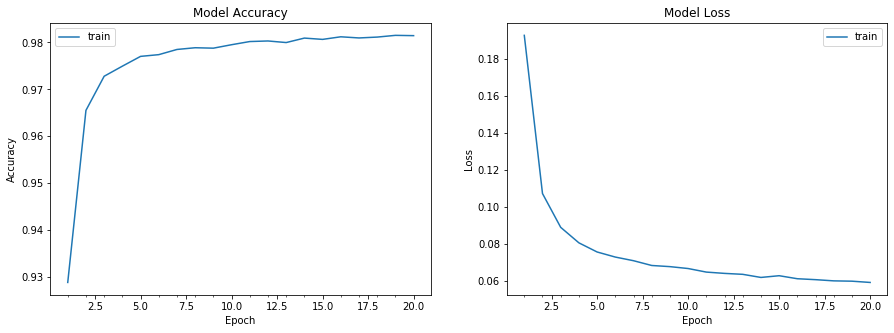

In [13]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
plot_model_history(model_info)